In [1]:
%matplotlib inline

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stats

In [3]:
#load data
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [11]:
#establish data frames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Clean the data

In [12]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [13]:
# get all of the columns that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [14]:
#Determine data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [18]:
# how many data points per type of city 

#make and array of types
city_data_df["type"].unique()

#get the number of data points
sum(city_data_df["type"]=="Rural")

18

In [19]:
#Rinse and repeat for ride data

In [20]:
#count the columns
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [21]:
#number of columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [22]:
#data types for the columns
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## merge the data frame

In [29]:
#Merge the data frames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# create the DataFrames

In [32]:
# create the Urban city data Frame

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [33]:
# create the Suburban city data Frame

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

In [35]:
#create the Rural city data Frame

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# Create the Variables

In [39]:
# Get the number of rides per type of city
#Urban
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [41]:
#Suburban
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

In [42]:
#Rural
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [43]:
#get the average fare per city

In [47]:
#urban avg fare

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [48]:
#suburban
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

In [49]:
#rural
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [52]:
# average number of drivers per city type

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [53]:
#suburban
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

In [54]:
#rural
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Create the bubble chart

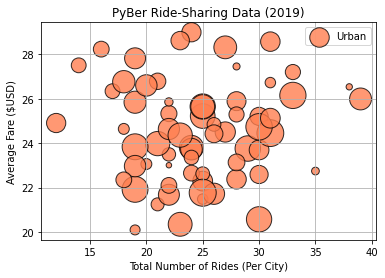

In [61]:
#build a scatter plot

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10*urban_driver_count,
            c = "coral",
            edgecolor = "black", linewidth = 1,
            alpha = 0.8, 
            label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($USD)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

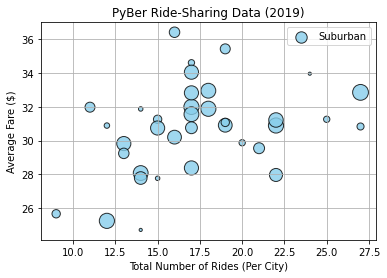

In [66]:
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s= 10* suburban_driver_count,
           c = "skyblue",
           edgecolor ="black",
           linewidths = 1,
           alpha = 0.8,
           label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

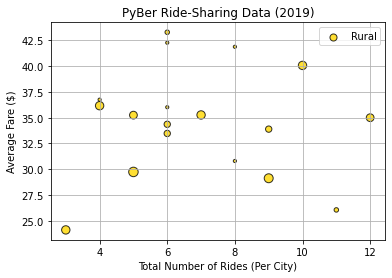

In [67]:
plt.scatter(rural_ride_count, 
           rural_avg_fare,
           s = 10* rural_driver_count,
           c = "gold",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

In [68]:
# combine the charts

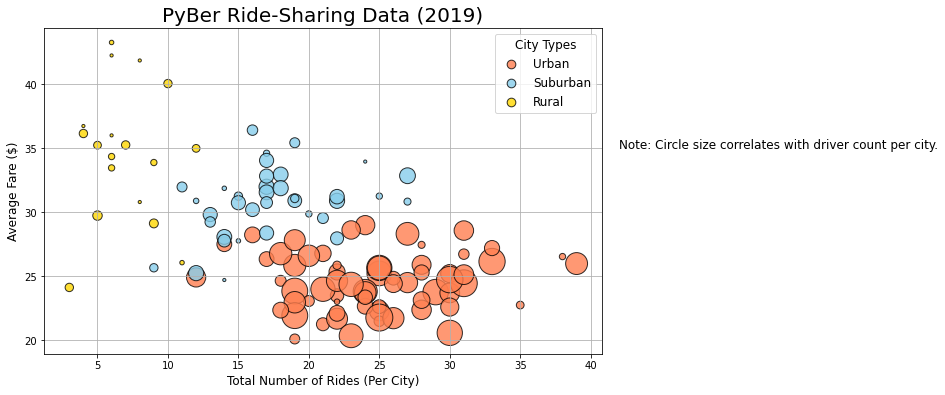

In [85]:
#add the scatter plots for each city type 
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10*urban_driver_count,
            c = "coral",
            edgecolor = "black", linewidth = 1,
            alpha = 0.8, 
            label = "Urban")
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s= 10* suburban_driver_count,
           c = "skyblue",
           edgecolor ="black",
           linewidths = 1,
           alpha = 0.8,
           label = "Suburban")
plt.scatter(rural_ride_count, 
           rural_avg_fare,
           s = 10* rural_driver_count,
           c = "gold",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

lgnd = plt.legend(fontsize = "12", 
                  mode = "Expanded",
                  scatterpoints = 1,
                  loc = "best",
                  title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#add a note for the reader

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#save the fig
plt.savefig("analysis/Fig1.png")

plt.show()